In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
titanic_df = pd.read_csv("/content/Titanic-Dataset.csv")

In [53]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [54]:
print(titanic_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90]))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

In [50]:
print(titanic_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


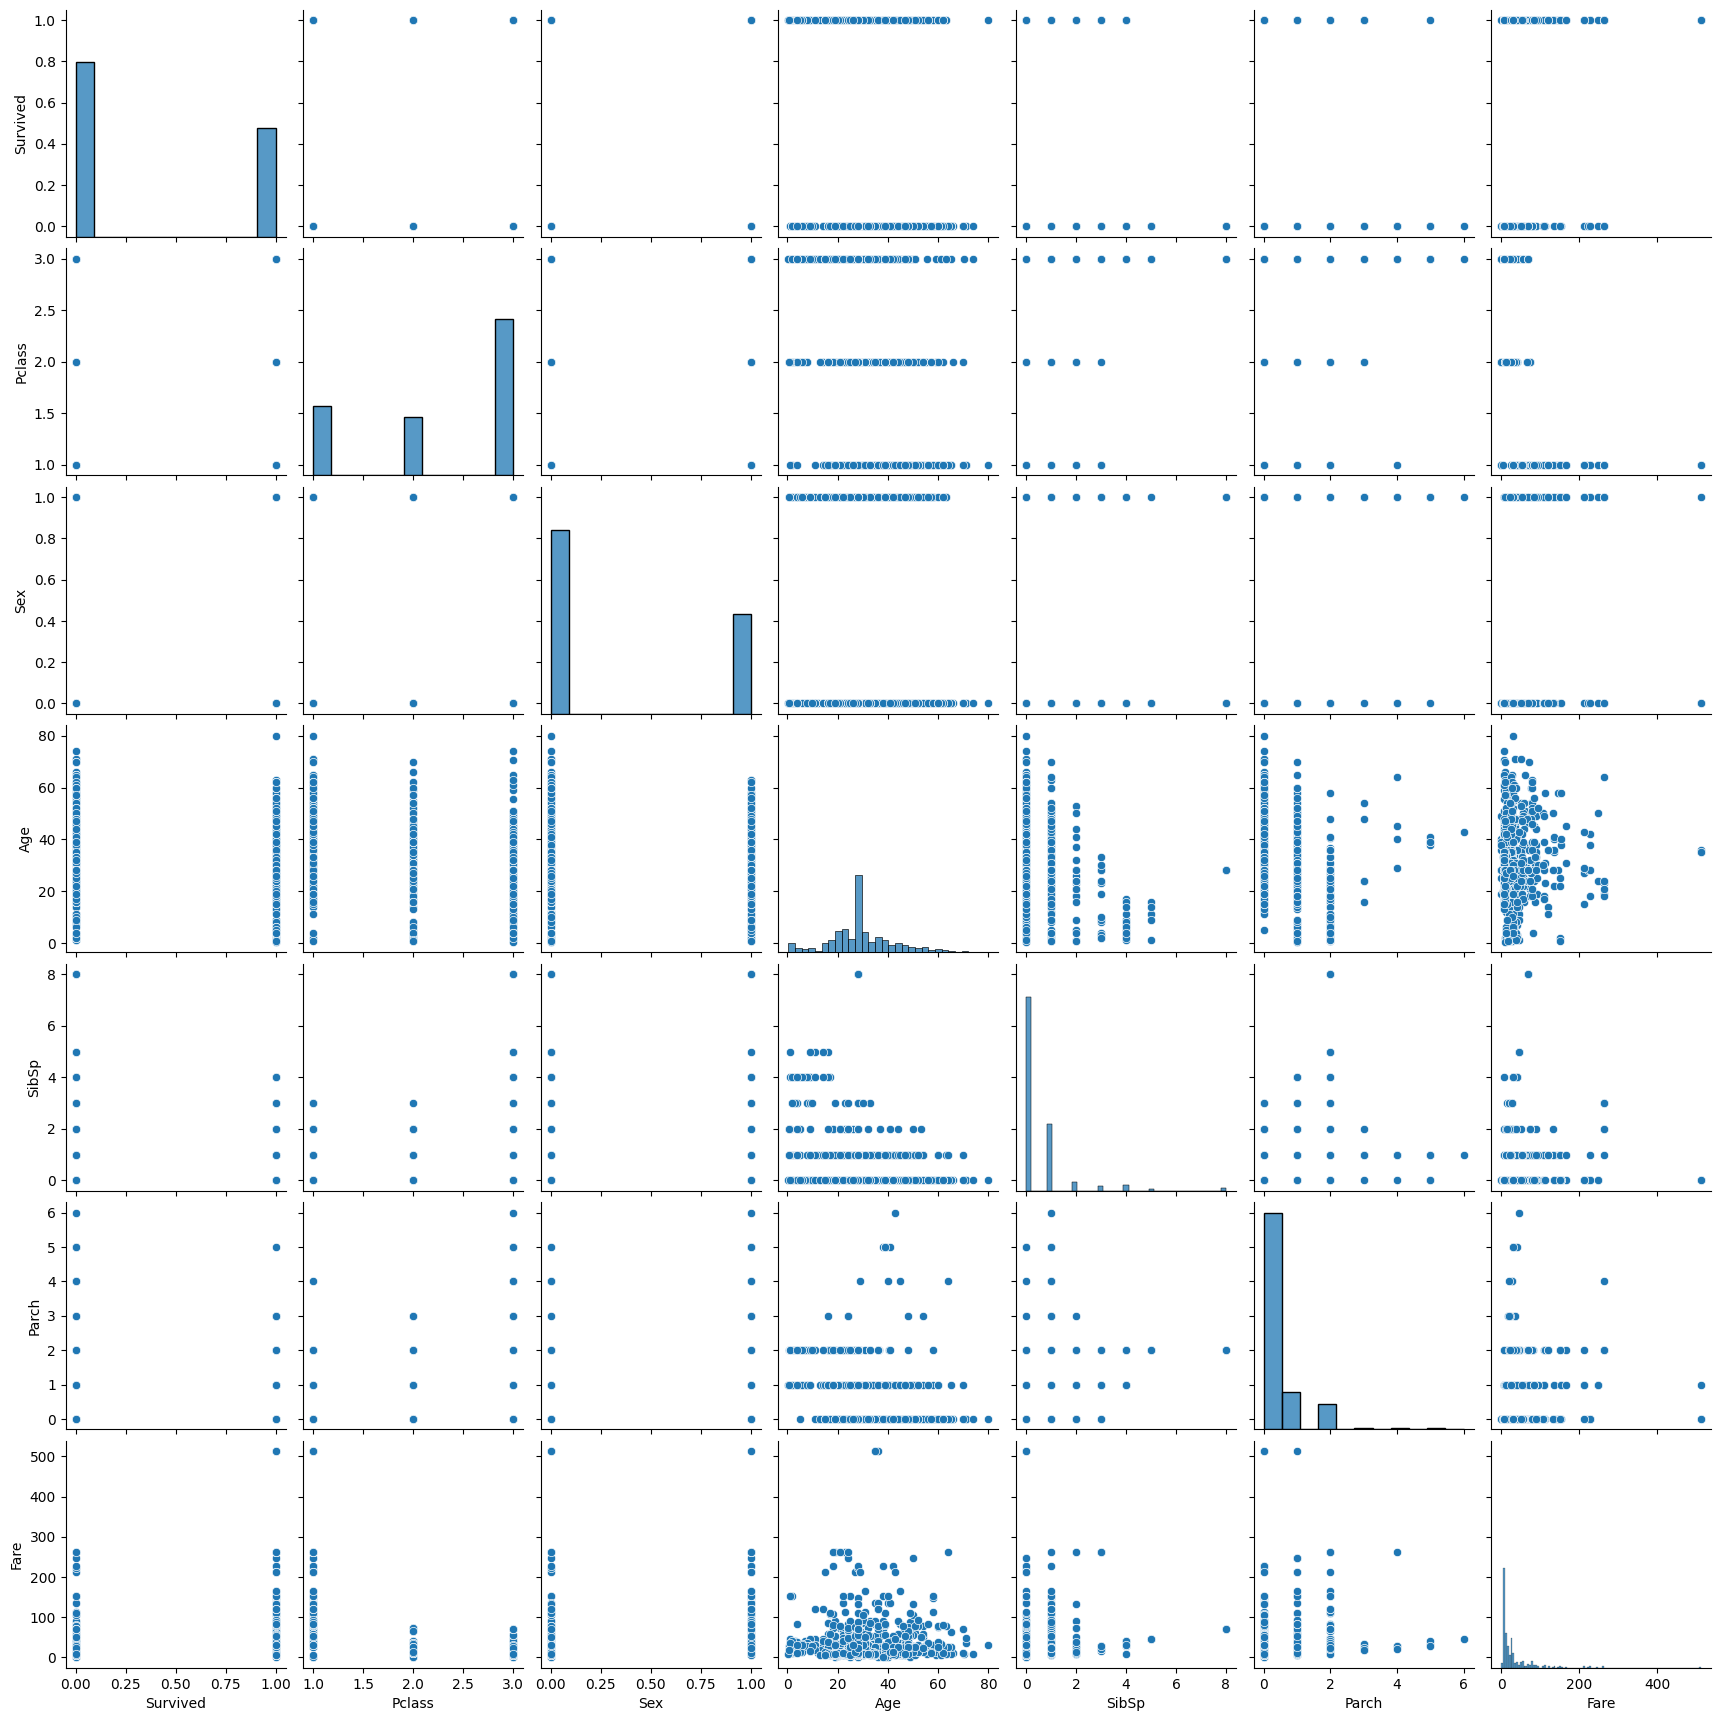

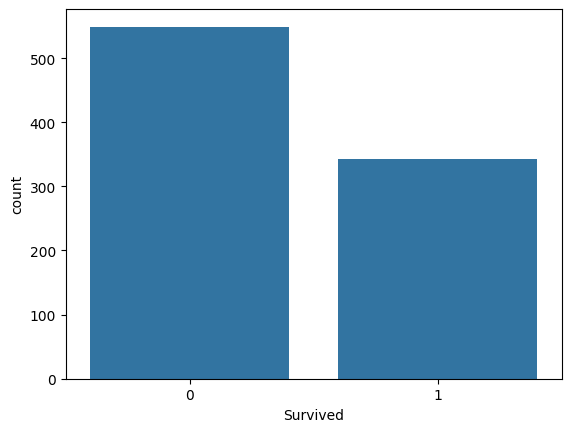

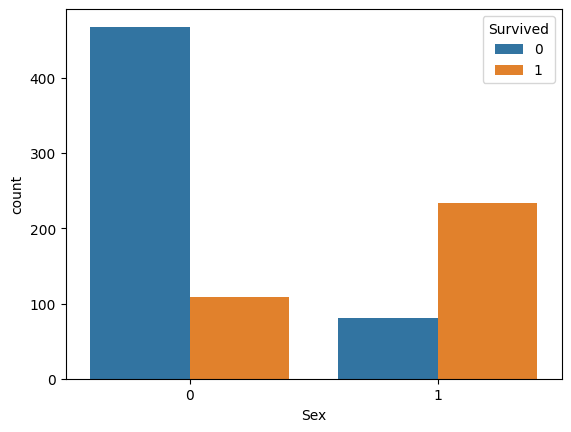

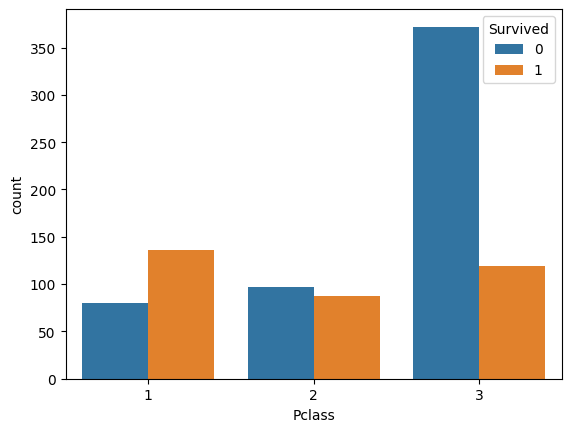

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


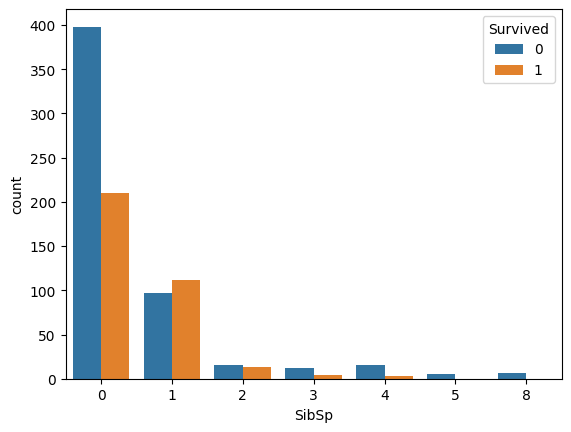

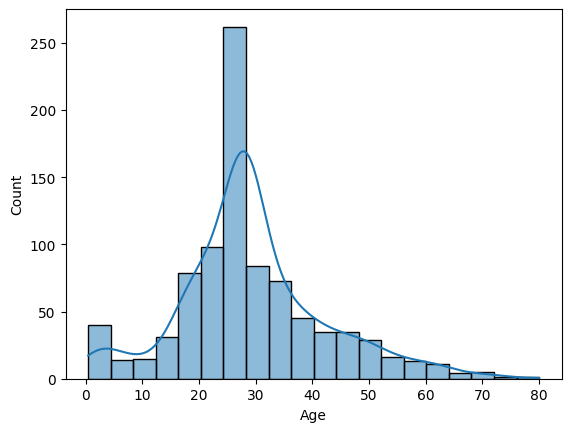

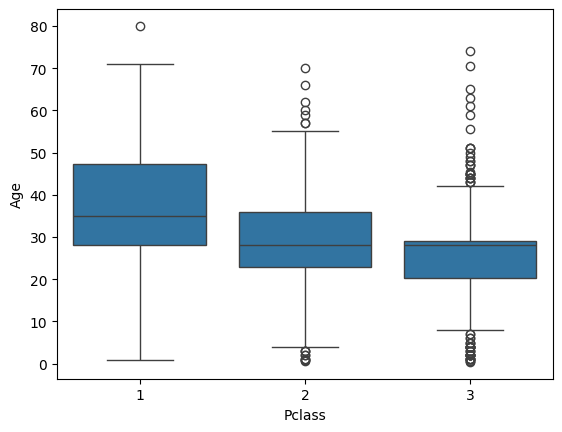

In [49]:

numeric_features = titanic_df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(titanic_df[numeric_features])
plt.show()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.show()

class_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()
print(class_survival_rate)

sns.countplot(x='SibSp', hue='Survived', data=titanic_df)
plt.show()

sns.histplot(data=titanic_df, x='Age', bins=20, kde=True)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

In [55]:

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,
inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [45]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
331       1    0  45.5      0      0   28.5000           0           0   
733       2    0  23.0      0      0   13.0000           0           0   
382       3    0  32.0      0      0    7.9250           0           0   
704       3    0  26.0      1      0    7.8542           0           0   
813       3    1   6.0      4      2   31.2750           0           0   
..      ...  ...   ...    ...    ...       ...         ...         ...   
106       3    1  21.0      0      0    7.6500           0           0   
270       1    0  28.0      0      0   31.0000           0           0   
860       3    0  41.0      2      0   14.1083           0           0   
435       1    1  14.0      1      2  120.0000           0           0   
102       1    0  21.0      0      1   77.2875           0           0   

     Embarked_S  
331           1  
733           1  
382           1  
704           1  
813           1  
.. 

In [46]:
logistic_model = LogisticRegression()

In [47]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score: 0.7638888888888888


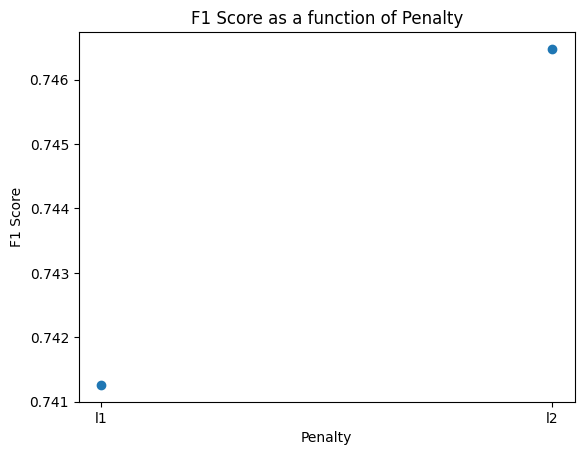

In [48]:
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    logistic_model_penalty = LogisticRegression(penalty=penalty, solver='liblinear')
    logistic_model_penalty.fit(X_train, y_train)
    y_pred_penalty = logistic_model_penalty.predict(X_test)
    f1_penalty = f1_score(y_test, y_pred_penalty)
    f1_scores.append(f1_penalty)

plt.scatter(penalties, f1_scores)
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score as a function of Penalty')
plt.show()
